In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [51]:
file_path = 'Age.xlsx'
data = pd.read_excel(file_path)

# EDA

In [52]:
data.head()

,age,Top 10,90th,80th,70th,60th,50th,40th,30th,20th,10th
0,9,2034.0,730,470,321,230,162,122,89,62,37
1,10,3242.0,1025,622,455,350,268,199,142,99,56
2,11,4171.0,1404,843,619,466,361,280,200,130,70
3,12,7023.0,1819,1161,843,653,491,370,268,181,96
4,13,10804.0,2536,1594,1139,846,654,472,335,225,122


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     75 non-null     int64  
 1   Top 10  71 non-null     float64
 2   90th    75 non-null     int64  
 3   80th    75 non-null     int64  
 4   70th    75 non-null     int64  
 5   60th    75 non-null     int64  
 6   50th    75 non-null     int64  
 7   40th    75 non-null     int64  
 8   30th    75 non-null     int64  
 9   20th    75 non-null     int64  
 10  10th    75 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 6.6 KB


# 

In [54]:
data.isnull().sum()

age       0
Top 10    4
90th      0
80th      0
70th      0
60th      0
50th      0
40th      0
30th      0
20th      0
10th      0
dtype: int64

In [55]:
data.columns

Index(['age', 'Top 10', '90th', '80th', '70th', '60th', '50th', '40th', '30th',
       '20th', '10th'],
      dtype='object')

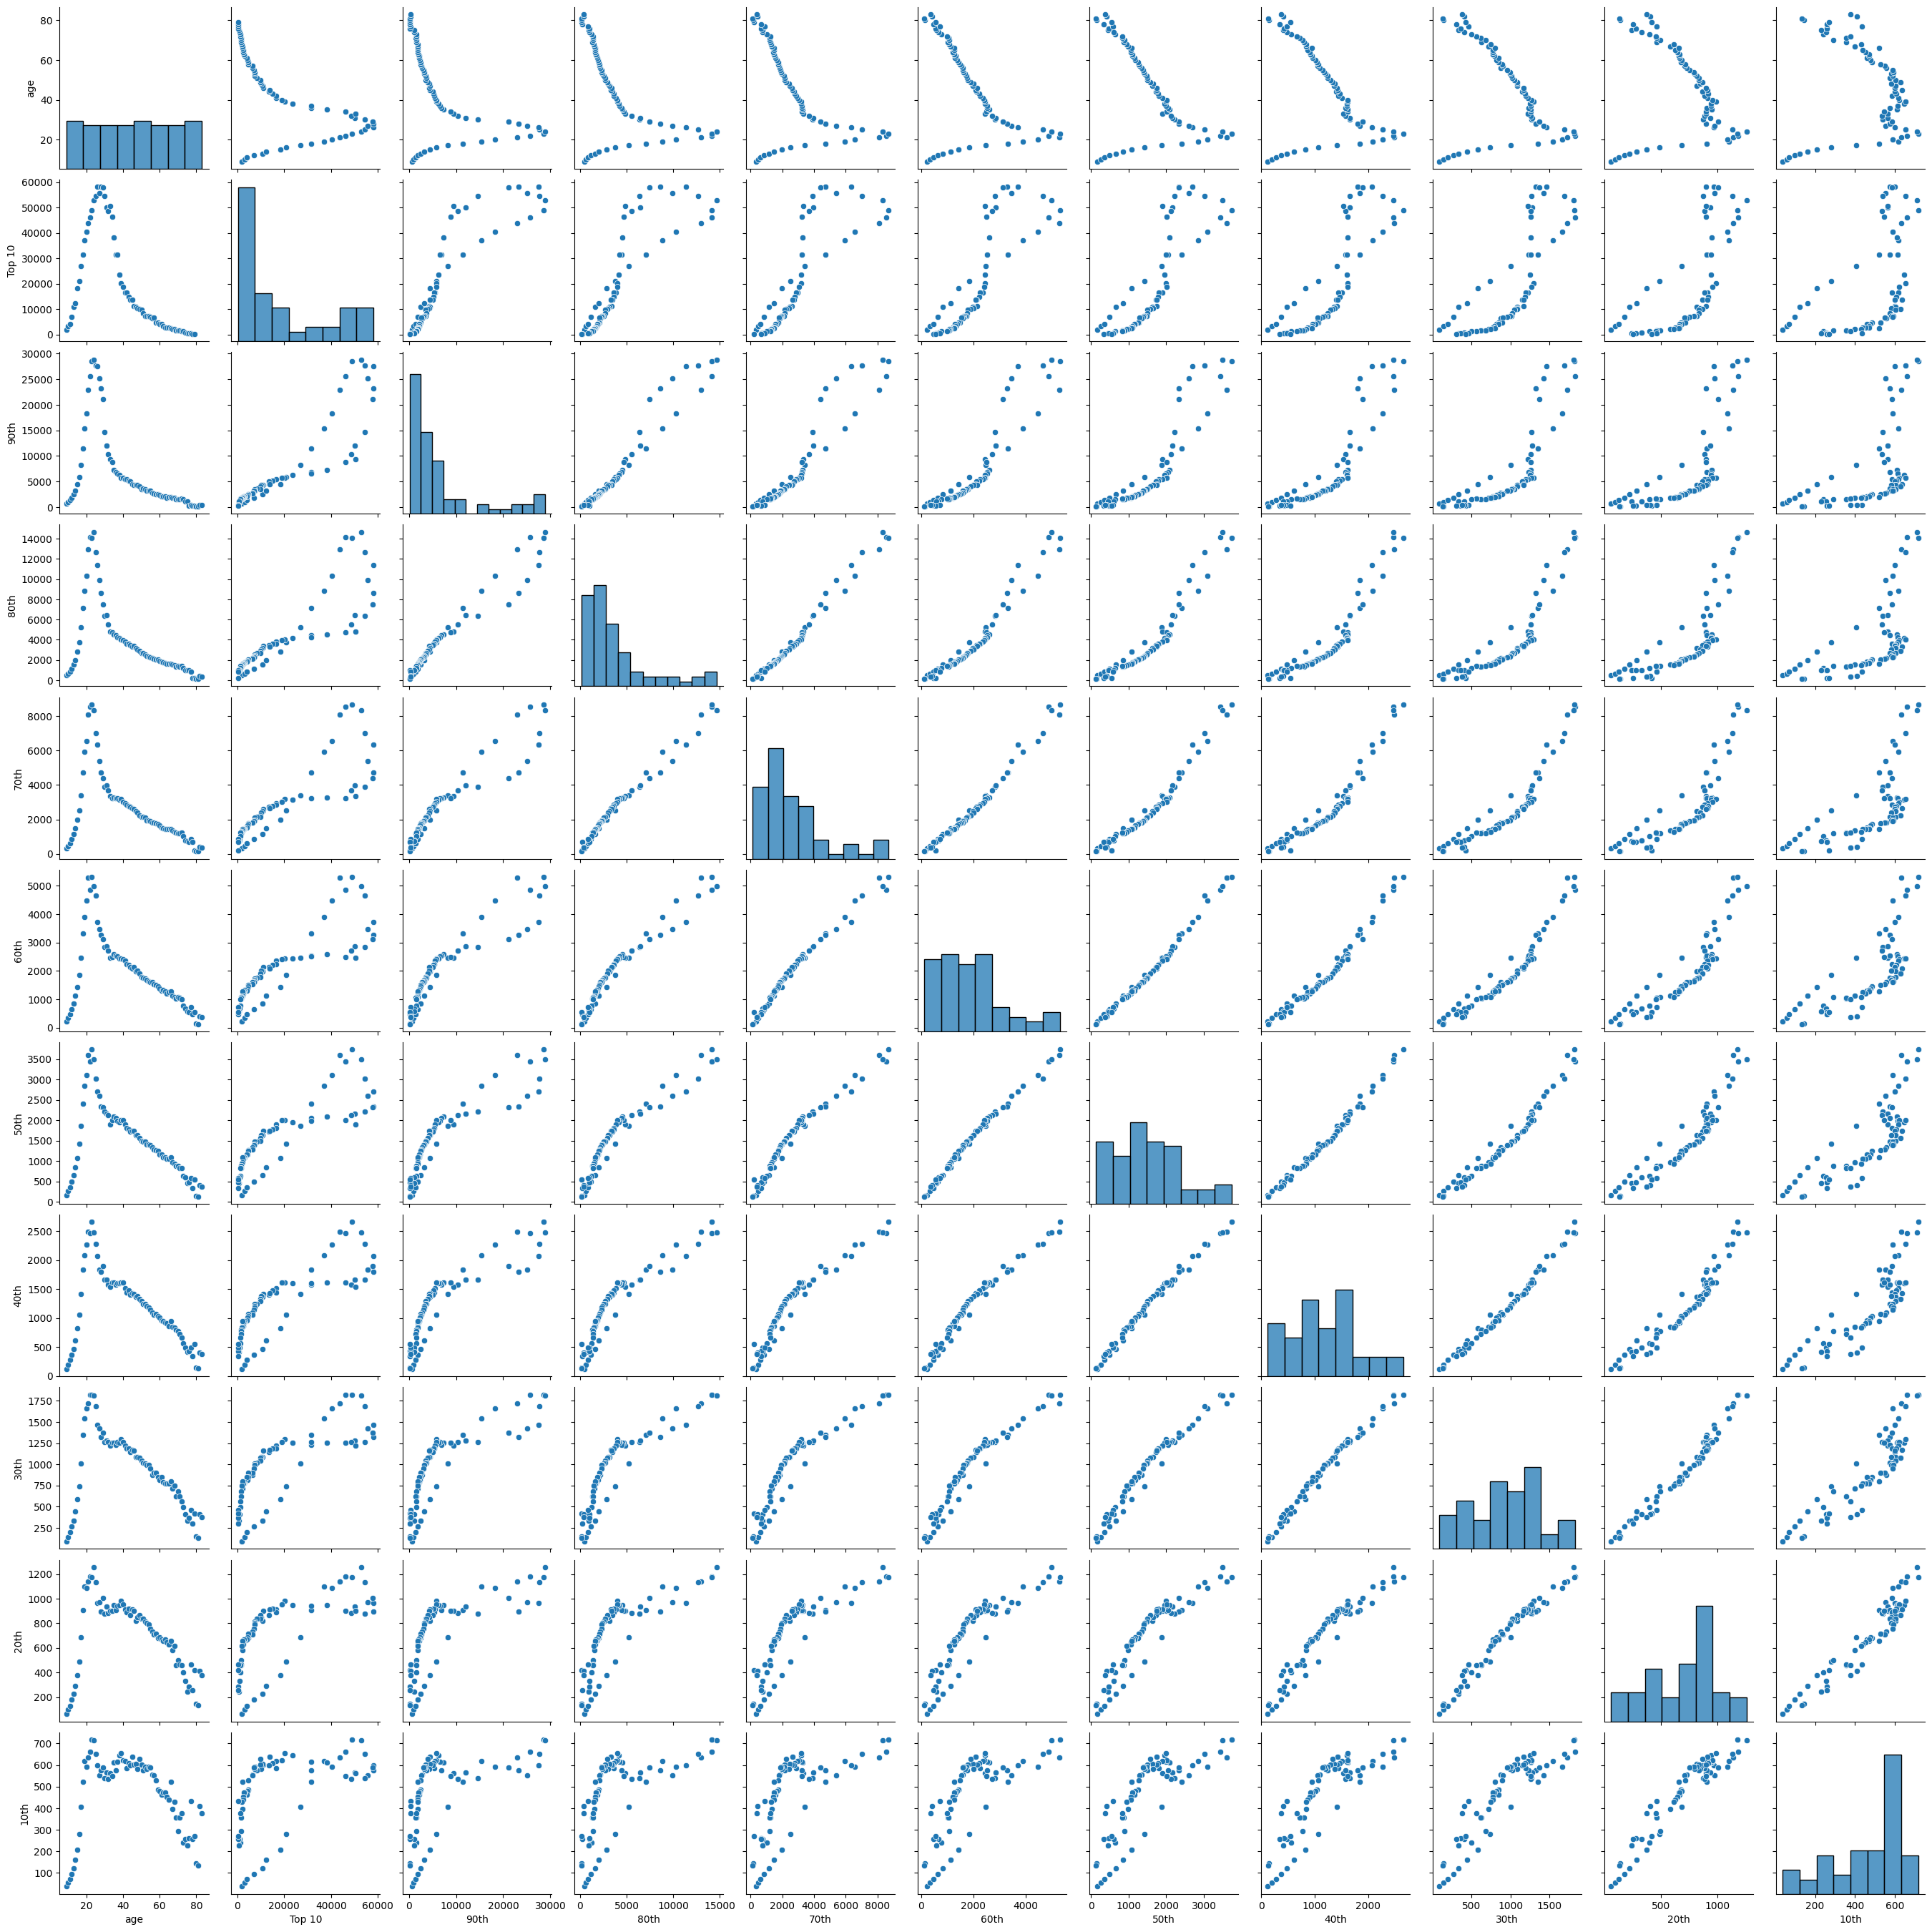

In [56]:
# pairplot
import seaborn as sns
sns.pairplot(data)

In [57]:
# Fill in missing values for 'Top 10' with the mean of the column
data['Top 10'].fillna(data['Top 10'].mean(), inplace=True)

/var/folders/3q/r2zc74911hn2f967w656zszm0000gn/T/ipykernel_70165/1119343836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Top 10'].fillna(data['Top 10'].mean(), inplace=True)


In [58]:
data.isnull().sum()

age       0
Top 10    0
90th      0
80th      0
70th      0
60th      0
50th      0
40th      0
30th      0
20th      0
10th      0
dtype: int64

# Model Building and Evaluation

In [59]:
X = data[['age']].values
y = data.drop('age', axis=1).values

In [60]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Polynomial Features
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [62]:
# Linear Regression Model
model = LinearRegression()

In [63]:
# Dictionary to hold evaluation metrics for each percentile
percentile_performance = {}

In [64]:
# Iterate through each percentile column except 'age' and 'Top 10'
for percentile in data.columns[2:]:
    # Selecting target variable for the current percentile
    y = data[percentile].values
    
    # Splitting the data into training and testing sets for the current percentile
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Transforming features for polynomial regression
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Training the model
    model.fit(X_train_poly, y_train)
    
    # Predicting on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Evaluating the model for the current percentile
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Storing the metrics
    percentile_performance[percentile] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R^2': train_r2,
        'Test R^2': test_r2
    }

In [65]:
import matplotlib.pyplot as plt

# Extracting percentile names, training and testing MSE, and R^2 scores for plotting
percentiles = list(percentile_performance.keys())
train_mse = [percentile_performance[percentile]['Train MSE'] for percentile in percentiles]
test_mse = [percentile_performance[percentile]['Test MSE'] for percentile in percentiles]
train_r2 = [percentile_performance[percentile]['Train R^2'] for percentile in percentiles]
test_r2 = [percentile_performance[percentile]['Test R^2'] for percentile in percentiles]


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '90th'),
  Text(1, 0, '80th'),
  Text(2, 0, '70th'),
  Text(3, 0, '60th'),
  Text(4, 0, '50th'),
  Text(5, 0, '40th'),
  Text(6, 0, '30th'),
  Text(7, 0, '20th'),
  Text(8, 0, '10th')])

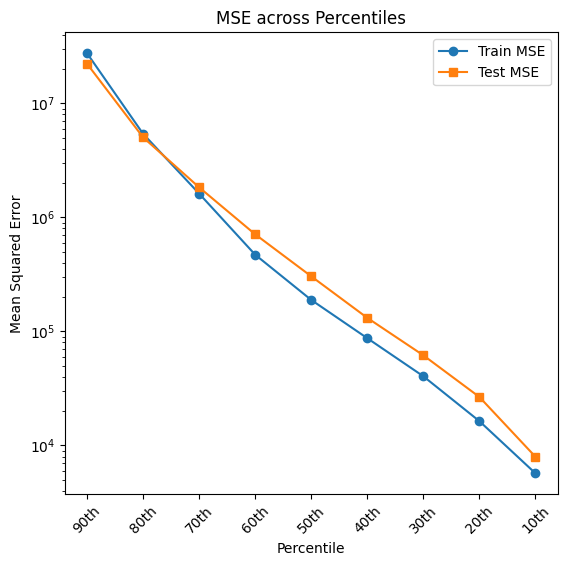

In [66]:
# Plotting MSE
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(percentiles, train_mse, label='Train MSE', marker='o')
plt.plot(percentiles, test_mse, label='Test MSE', marker='s')
plt.title('MSE across Percentiles')
plt.xlabel('Percentile')
plt.ylabel('Mean Squared Error')
plt.yscale('log')  # Using logarithmic scale due to wide range of MSE values
plt.legend()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '90th'),
  Text(1, 0, '80th'),
  Text(2, 0, '70th'),
  Text(3, 0, '60th'),
  Text(4, 0, '50th'),
  Text(5, 0, '40th'),
  Text(6, 0, '30th'),
  Text(7, 0, '20th'),
  Text(8, 0, '10th')])

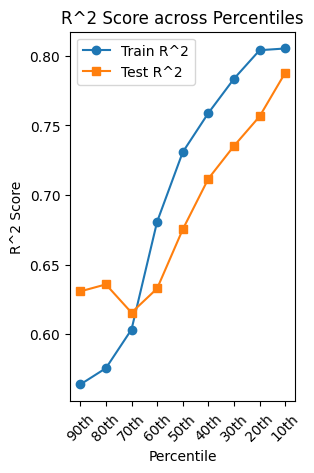

In [67]:
# Plotting R^2
plt.subplot(1, 2, 2)
plt.plot(percentiles, train_r2, label='Train R^2', marker='o')
plt.plot(percentiles, test_r2, label='Test R^2', marker='s')
plt.title('R^2 Score across Percentiles')
plt.xlabel('Percentile')
plt.ylabel('R^2 Score')
plt.legend()
plt.xticks(rotation=45)

# Predict using model

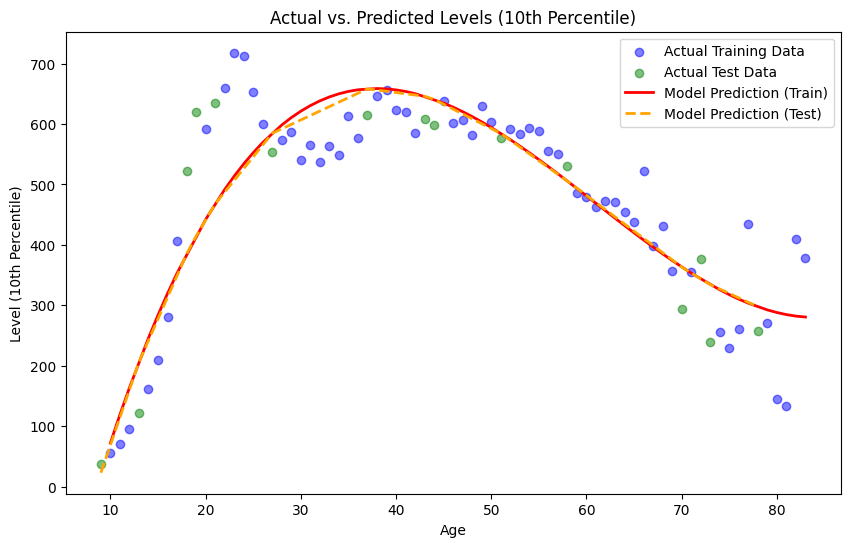

In [68]:
# Focusing on the 10th percentile for visualization
y_10th = data['10th'].values
X_train, X_test, y_train, y_test = train_test_split(X, y_10th, test_size=0.2, random_state=42)

# Polynomial transformation
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Predicting using the model trained on the 10th percentile
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Plotting actual vs predicted for the 10th percentile
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='Actual Test Data', alpha=0.5)
plt.plot(np.sort(X_train, axis=0), model.predict(poly_features.transform(np.sort(X_train, axis=0))), color='red', label='Model Prediction (Train)', linewidth=2)
plt.plot(np.sort(X_test, axis=0), model.predict(poly_features.transform(np.sort(X_test, axis=0))), color='orange', label='Model Prediction (Test)', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Levels (10th Percentile)')
plt.xlabel('Age')
plt.ylabel('Level (10th Percentile)')
plt.legend()
plt.show()


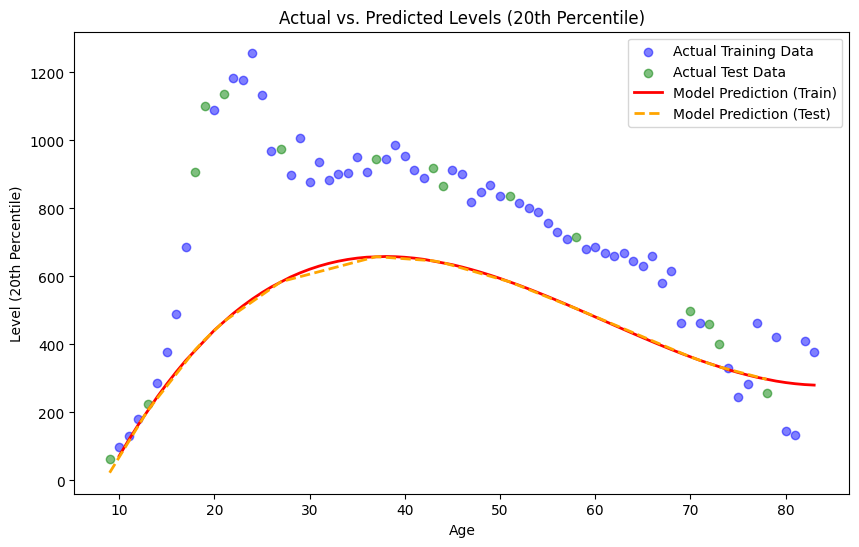

In [70]:
# Focusing on the 20th percentile for visualization
y_20th = data['20th'].values
X_train, X_test, y_train, y_test = train_test_split(X, y_20th, test_size=0.2, random_state=42)

# Polynomial transformation
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Predicting using the model trained on the 20th percentile
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Plotting actual vs predicted for the 20th percentile
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='Actual Test Data', alpha=0.5)
plt.plot(np.sort(X_train, axis=0), model.predict(poly_features.transform(np.sort(X_train, axis=0))), color='red', label='Model Prediction (Train)', linewidth=2)
plt.plot(np.sort(X_test, axis=0), model.predict(poly_features.transform(np.sort(X_test, axis=0))), color='orange', label='Model Prediction (Test)', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Levels (20th Percentile)')
plt.xlabel('Age')
plt.ylabel('Level (20th Percentile)')
plt.legend()
plt.show()


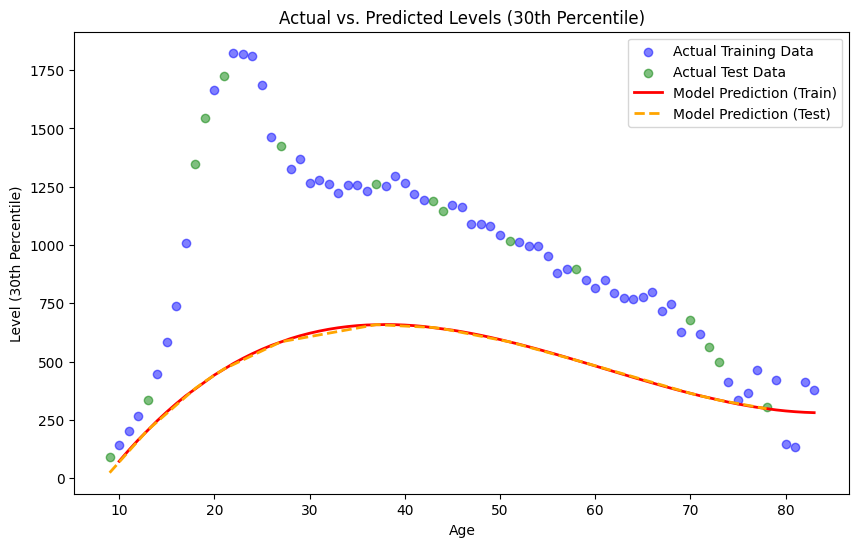

In [71]:
# Focusing on the 30th percentile for visualization
y_30th = data['30th'].values
X_train, X_test, y_train, y_test = train_test_split(X, y_30th, test_size=0.2, random_state=42)

# Polynomial transformation
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Predicting using the model trained on the 30th percentile
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Plotting actual vs predicted for the 30th percentile
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='Actual Test Data', alpha=0.5)
plt.plot(np.sort(X_train, axis=0), model.predict(poly_features.transform(np.sort(X_train, axis=0))), color='red', label='Model Prediction (Train)', linewidth=2)
plt.plot(np.sort(X_test, axis=0), model.predict(poly_features.transform(np.sort(X_test, axis=0))), color='orange', label='Model Prediction (Test)', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Levels (30th Percentile)')
plt.xlabel('Age')
plt.ylabel('Level (30th Percentile)')
plt.legend()
plt.show()
